In [1]:
import pandas as pd 

In [3]:
df = pd.read_csv("Credit_card_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CUST_ID,8950,8950,C19190,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALANCE_FREQUENCY,8950.0,NaN,NaN,NaN,0.877271,0.236904,0.0,0.888889,1.0,1.0,1.0
PURCHASES,8950.0,NaN,NaN,NaN,1003.204834,2136.634782,0.0,39.635,361.28,1110.13,49039.57
PAYMENTS,8950.0,NaN,NaN,NaN,1733.143852,2895.063757,0.0,383.276166,856.901546,1901.134317,50721.48336
CREDIT_LIMIT,8949.0,NaN,NaN,NaN,4494.44945,3638.815725,50.0,1600.0,3000.0,6500.0,30000.0
CASH_ADVANCE,8950.0,NaN,NaN,NaN,978.871112,2097.163877,0.0,0.0,0.0,1113.821139,47137.21176


In [8]:
from ydata_profiling import ProfileReport
df_profile = ProfileReport (df,title="Profile Report Credit")
df_profile.to_notebook_iframe()
df_profile.to_file("Rapport_Credit")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 41.70it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\BAN CYRILLE\MonDossier\envs\myenv\lib\site-packages\ydata_profiling\profile_report.py:386: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
Dans notre phase d'exploration nous avons constater qu'il n'y pas de valeurs manquantes , nous allons rechercher les valeurs aberrantes qui pourraient 
etre un soucis le clustering .

In [14]:
def detection_val_ab(df):
    outliers_dict = {}
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols :
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        seuil_inf = Q1 - 1.5 * IQR
        seuil_sup = Q3 + 1.5 * IQR

        # Sélection des lignes où la colonne a des outliers
        outliers = df[(df[col] < seuil_inf) | (df[col] > seuil_sup)]
        outliers_dict[col] = outliers
    return outliers_dict


detection_val_ab(df)

{'BALANCE_FREQUENCY':      CUST_ID  BALANCE_FREQUENCY  PURCHASES      PAYMENTS  CREDIT_LIMIT  \
 3     C10004           0.636364    1499.00      0.000000        7500.0   
 9     C10010           0.545455    1281.60   1164.770591       11000.0   
 17    C10018           0.454545     519.00    254.590662        2500.0   
 22    C10023           0.636364     815.90   2359.629958        1800.0   
 39    C10040           0.454545     963.24  20071.075440        7500.0   
 ...      ...                ...        ...           ...           ...   
 8929  C19170           0.333333       0.00      0.000000        1500.0   
 8937  C19178           0.666667       0.00    117.738787        1000.0   
 8938  C19179           0.500000       0.00   1397.770131        1200.0   
 8943  C19184           0.500000      20.90     58.644883         500.0   
 8949  C19190           0.666667    1093.25     63.165404        1200.0   
 
       CASH_ADVANCE  
 3       205.788017  
 9         0.000000  
 17        

In [15]:
def detection_val_ab(df):
    outliers_dict = {}
    numeric_cols = df.select_dtypes(include=['number']).columns

    print("Résumé des outliers détectés :")
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        seuil_inf = Q1 - 1.5 * IQR
        seuil_sup = Q3 + 1.5 * IQR

        outliers = df[(df[col] < seuil_inf) | (df[col] > seuil_sup)]
        outliers_dict[col] = outliers
        print(f"- {col} : {len(outliers)} outliers")

    return outliers_dict

detection_val_ab(df)

Résumé des outliers détectés :
- BALANCE_FREQUENCY : 1493 outliers
- PURCHASES : 808 outliers
- PAYMENTS : 808 outliers
- CREDIT_LIMIT : 248 outliers
- CASH_ADVANCE : 1030 outliers


{'BALANCE_FREQUENCY':      CUST_ID  BALANCE_FREQUENCY  PURCHASES      PAYMENTS  CREDIT_LIMIT  \
 3     C10004           0.636364    1499.00      0.000000        7500.0   
 9     C10010           0.545455    1281.60   1164.770591       11000.0   
 17    C10018           0.454545     519.00    254.590662        2500.0   
 22    C10023           0.636364     815.90   2359.629958        1800.0   
 39    C10040           0.454545     963.24  20071.075440        7500.0   
 ...      ...                ...        ...           ...           ...   
 8929  C19170           0.333333       0.00      0.000000        1500.0   
 8937  C19178           0.666667       0.00    117.738787        1000.0   
 8938  C19179           0.500000       0.00   1397.770131        1200.0   
 8943  C19184           0.500000      20.90     58.644883         500.0   
 8949  C19190           0.666667    1093.25     63.165404        1200.0   
 
       CASH_ADVANCE  
 3       205.788017  
 9         0.000000  
 17        

In [ ]:
Nous allons donc chercher à les visualiser afin d'en avoir le coeur nette .

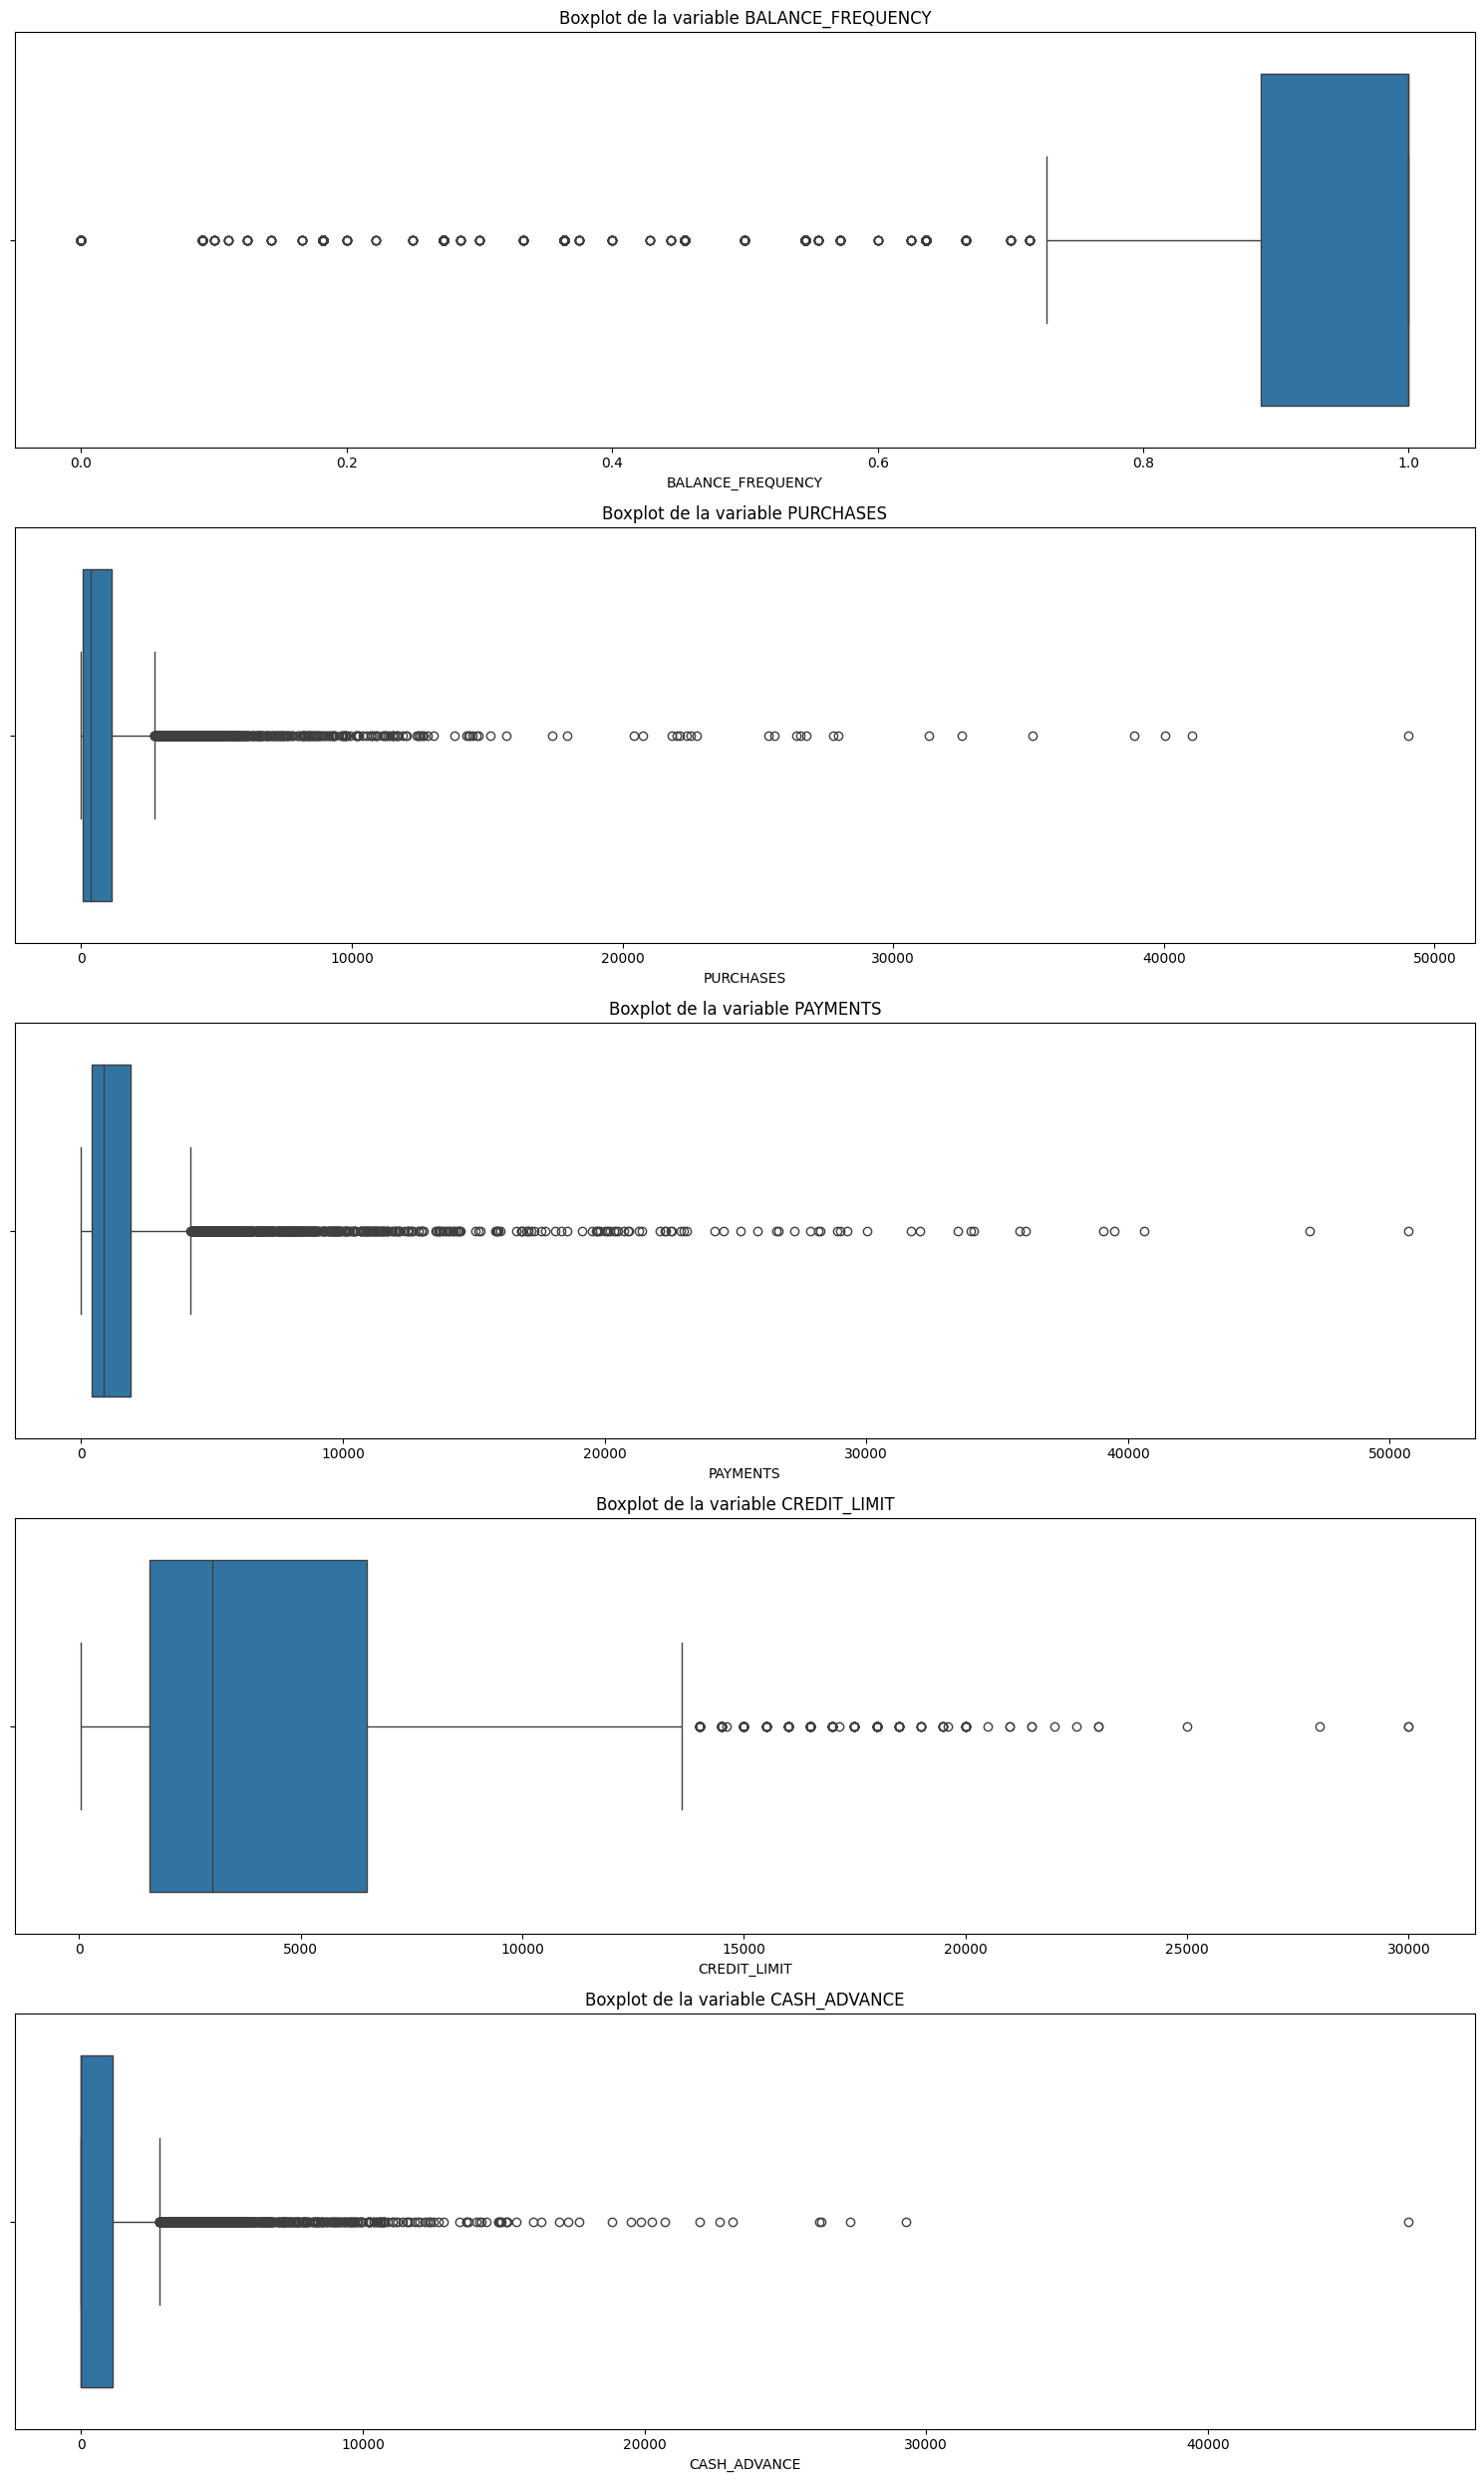

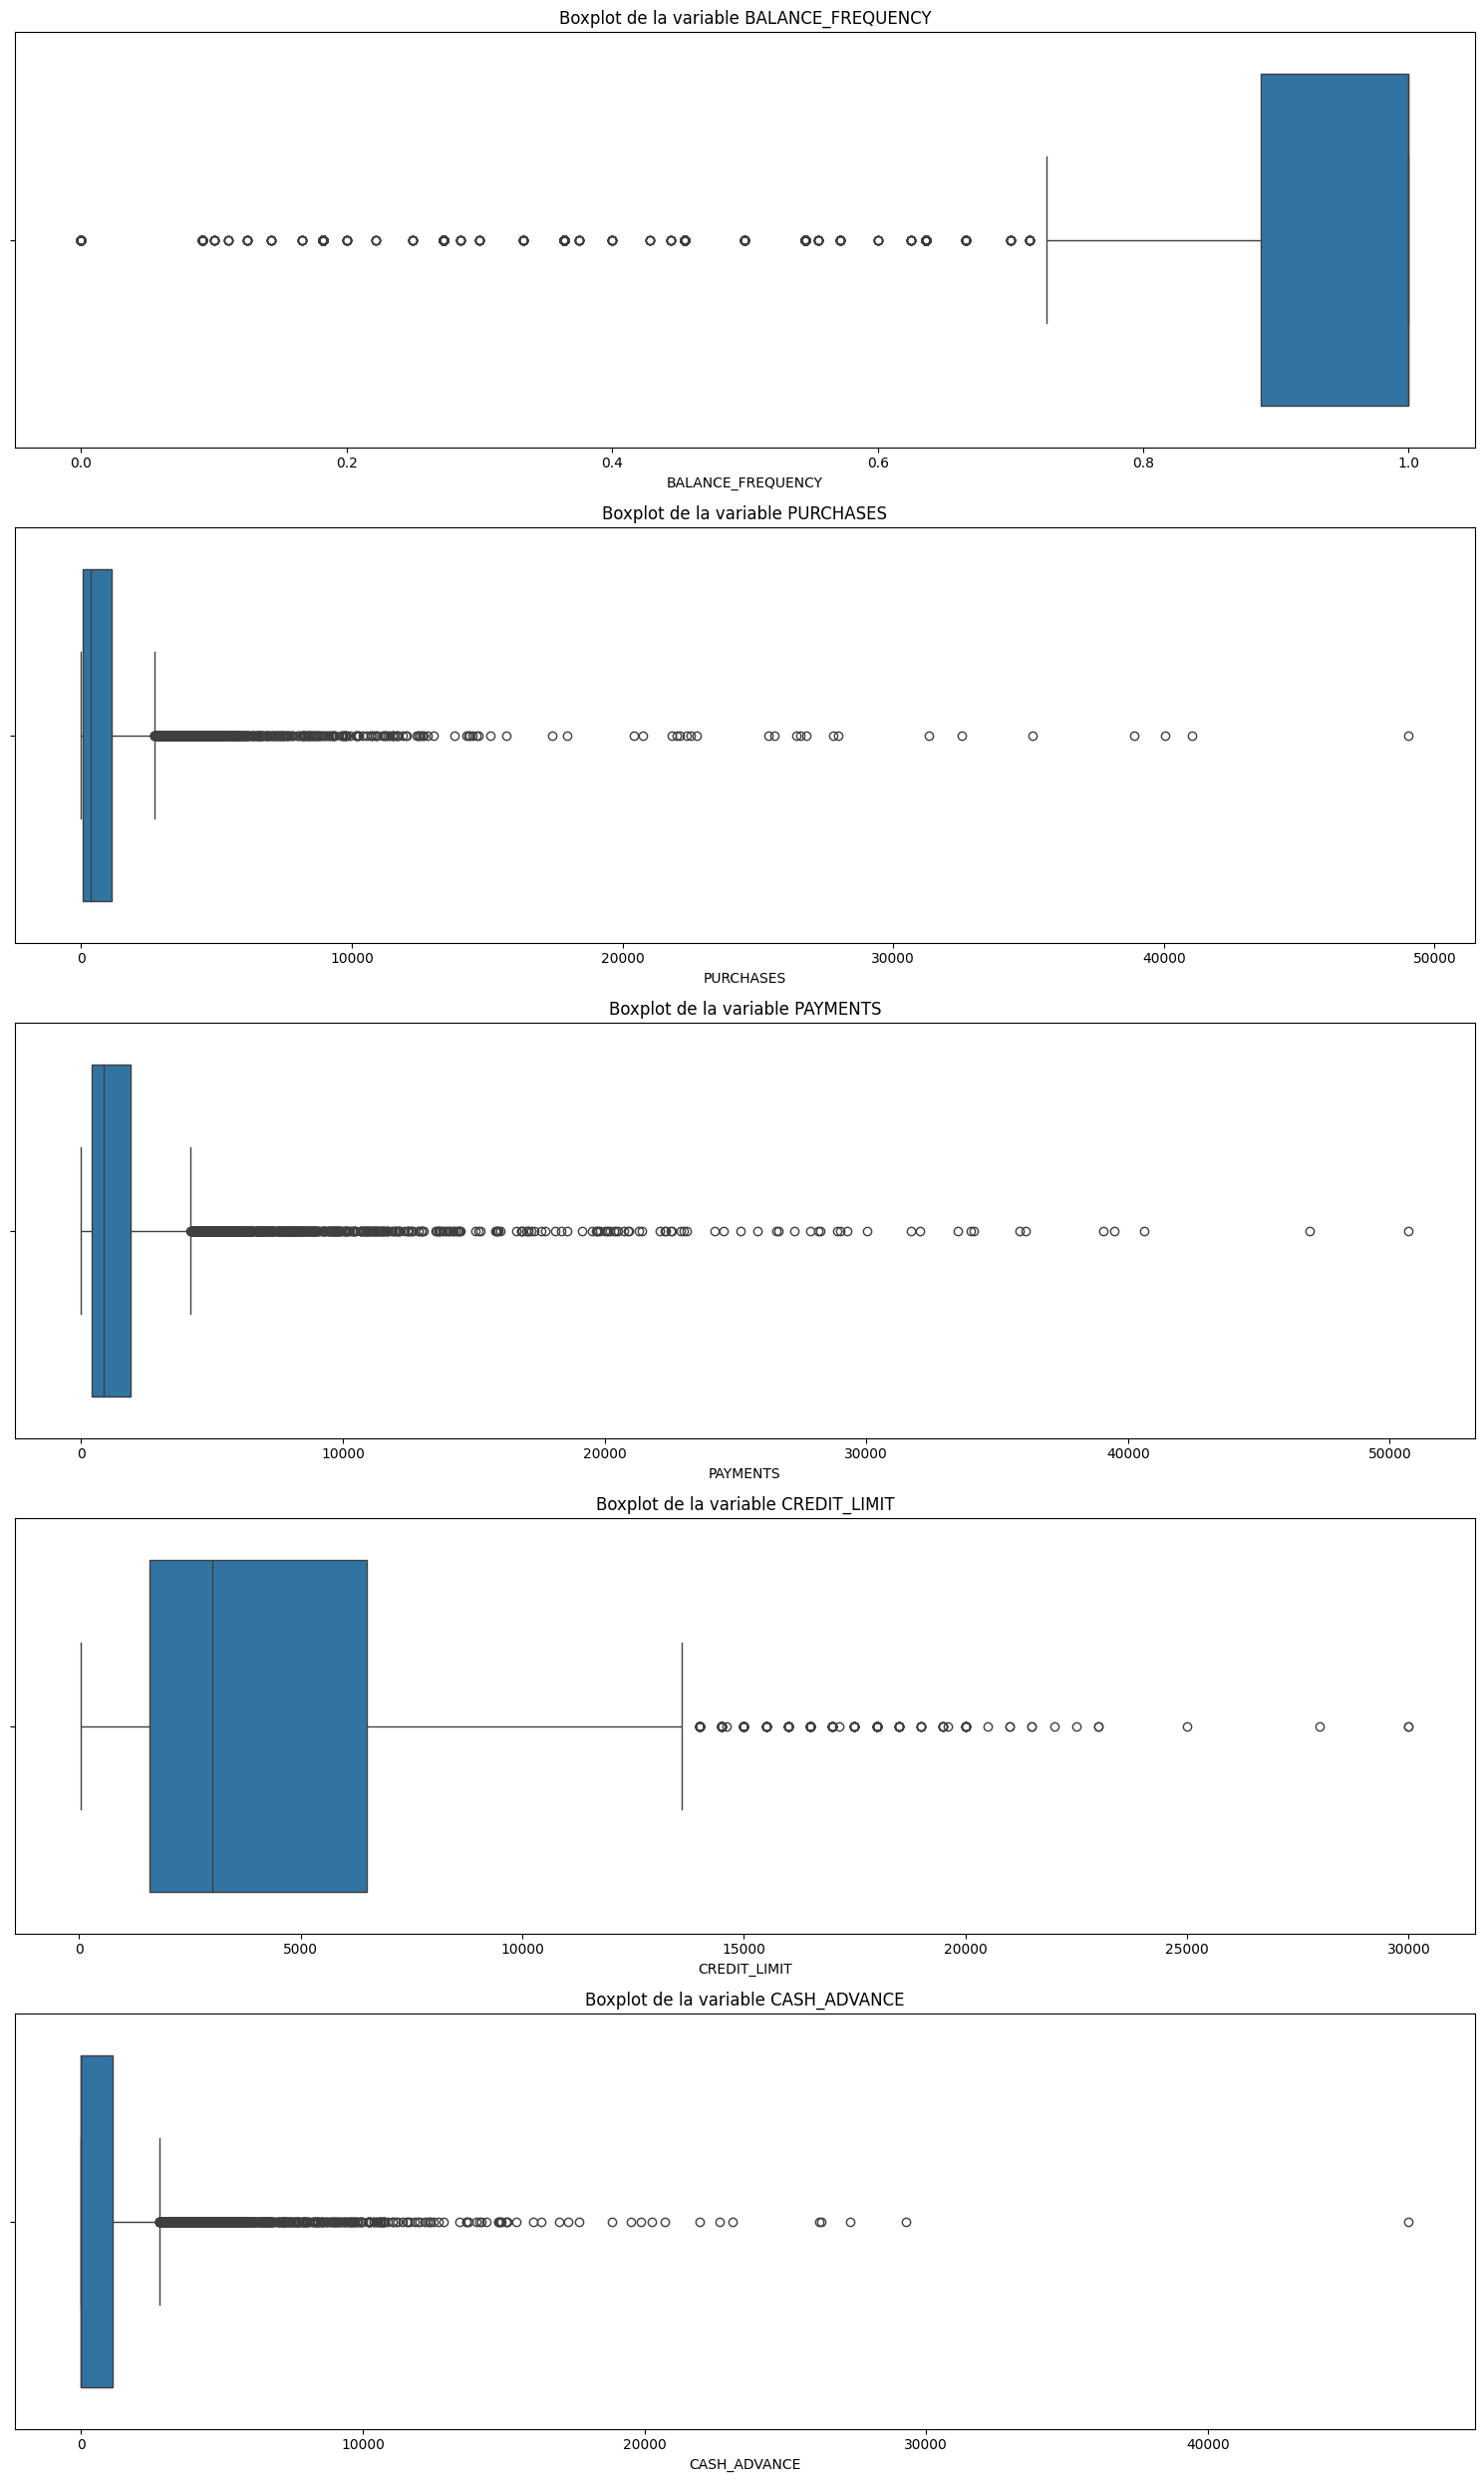

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

def boxplots_variables(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    plt.figure(figsize=(15, 5 * len(numeric_cols)))
    
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols), 1, i)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot de la variable {col}")
        plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

# Appelle la fonction avec ton DataFrame
boxplots_variables(df)


In [ ]:
Nous allons donc normaliser nos données afin d'avoir un modèle interressant .Mais avant ça nous devons nettoyer Credit_Limit 

In [19]:
# Supprimer la ligne où CREDIT_LIMIT est manquant
df = df[df['CREDIT_LIMIT'].notna()]

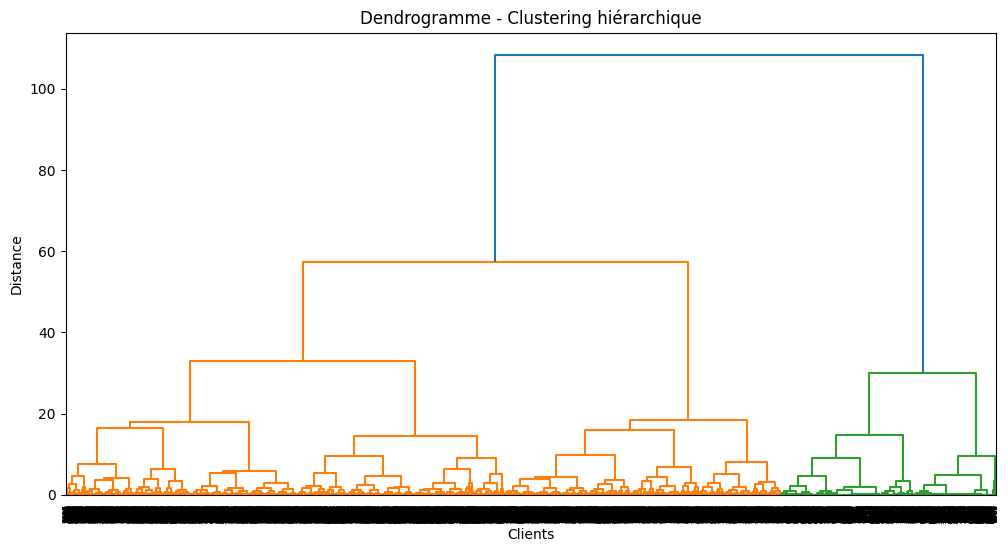

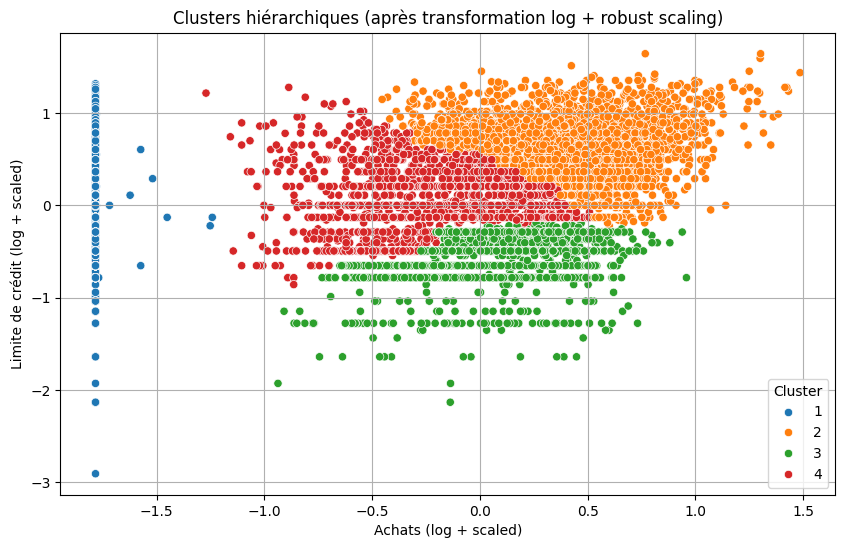

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Étape 1 : Transformation log1p de toutes les colonnes numériques
numeric_cols = df.select_dtypes(include='number').columns
df_log = df.copy()
df_log[numeric_cols] = np.log1p(df[numeric_cols])  # log1p(x) = log(1 + x)

# Étape 2 : Mise à l’échelle robuste
scaler = RobustScaler()
df_scaled = df_log.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_log[numeric_cols])

# Étape 3 : Clustering hiérarchique sur 2 variables
X = df_scaled[['PURCHASES', 'CREDIT_LIMIT']]

linked = linkage(X, method='ward')

# Dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogramme - Clustering hiérarchique')
plt.xlabel('Clients')
plt.ylabel('Distance')
plt.show()

# Étape 4 : Découpage en clusters
clusters = fcluster(linked, t=4, criterion='maxclust')
df_scaled['Cluster'] = clusters

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scaled, x='PURCHASES', y='CREDIT_LIMIT', hue='Cluster', palette='tab10')
plt.title('Clusters hiérarchiques (après transformation log + robust scaling)')
plt.xlabel('Achats (log + scaled)')
plt.ylabel('Limite de crédit (log + scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
Effectuons un clustering partitionnel à l'aide de l'algorithme K-means. Tracez ensuite les clusters.

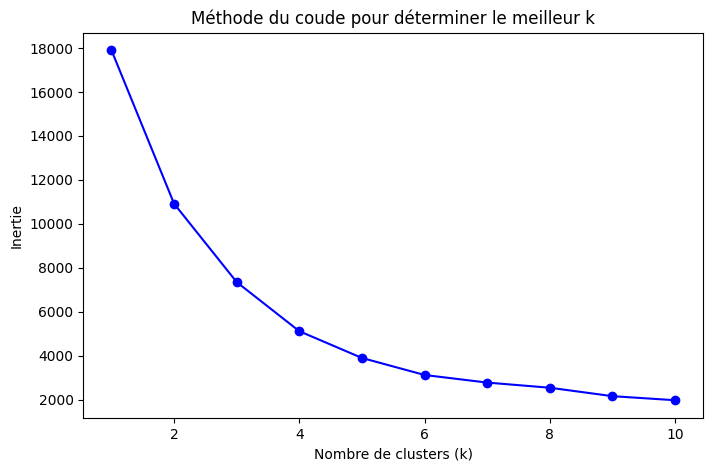

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Étape 1 : Variables à utiliser
X = df[['PURCHASES', 'CREDIT_LIMIT']].dropna()

# Étape 2 : Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Étape 3 : Méthode du coude pour trouver le meilleur k
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title("Méthode du coude pour déterminer le meilleur k")
plt.show()

In [ ]:
D'après notre courbe , nous allons choisir comme nombre de cluster 3 .

In [26]:
# Étape 4 : Appliquer K-means avec k=3

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajouter les clusters au DataFrame original
df_kmeans = X.copy()
df_kmeans['Cluster'] = clusters


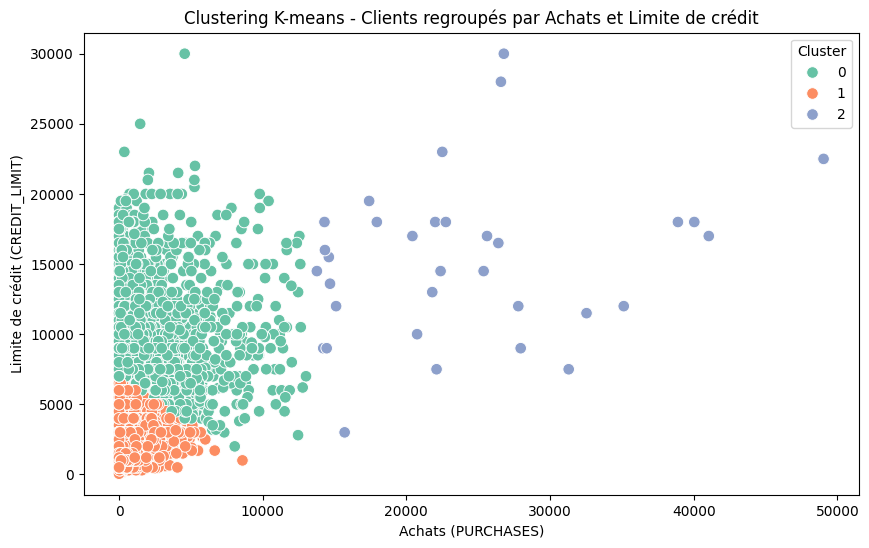

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_kmeans,
    x='PURCHASES',
    y='CREDIT_LIMIT',
    hue='Cluster',
    palette='Set2',
    s=70
)
plt.title("Clustering K-means - Clients regroupés par Achats et Limite de crédit")
plt.xlabel("Achats (PURCHASES)")
plt.ylabel("Limite de crédit (CREDIT_LIMIT)")
plt.legend(title='Cluster')
plt.show()

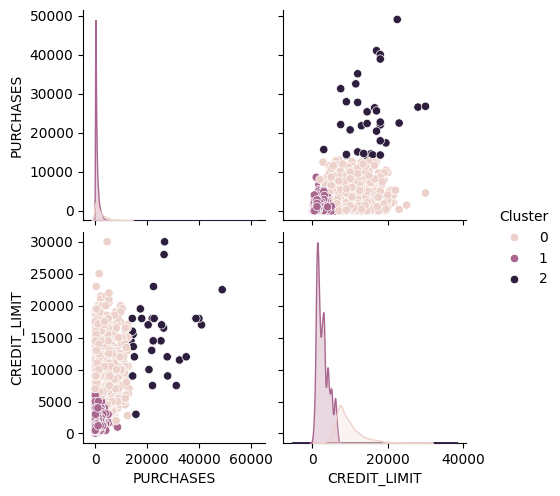

In [30]:
sns.pairplot(df_kmeans, hue='Cluster', vars=['PURCHASES', 'CREDIT_LIMIT'])
plt.show()


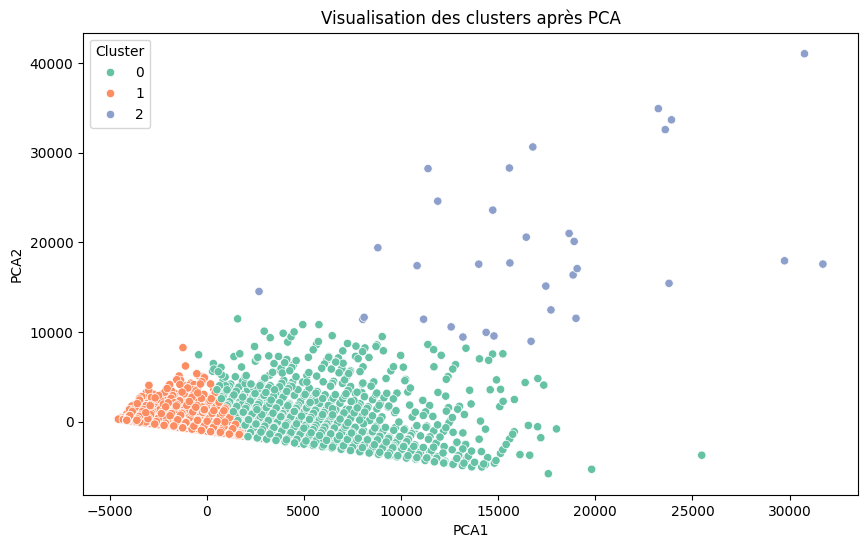

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# On garde les variables numériques (hors colonne 'Cluster')
features = df_kmeans.drop(columns=['Cluster'])

# Appliquer PCA sur 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Ajouter les composantes principales au DataFrame
df_kmeans['PCA1'] = pca_result[:, 0]
df_kmeans['PCA2'] = pca_result[:, 1]

# Visualiser
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_kmeans, palette='Set2')
plt.title("Visualisation des clusters après PCA")
plt.show()
